# **Lab Assessment 2**

### **Introduction to Pytorch**

In [1]:
# importing the required libraries
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

c:\Users\Prakhar Jadaun\.conda\envs\envpytorch\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [2]:
# creation of tensor
lst = [[1,2,3,4],
        [5,6,7,8],
        [9,10,11,12],
        [13,14,15,16]]
ten1 = torch.tensor(lst,dtype=torch.float)
ten1

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.]])

In [3]:
# getting the dimension of the created tensor
ten1.dim()

2

In [4]:
# creating another tensor to perform mathematical operation betweens the tensors
lst = [[101,102,103,104],
        [105,106,107,108],
        [109,110,111,112],
        [113,114,115,116]]
ten2 = torch.tensor(lst,dtype=torch.float32)
ten2

tensor([[101., 102., 103., 104.],
        [105., 106., 107., 108.],
        [109., 110., 111., 112.],
        [113., 114., 115., 116.]])

In [5]:
# adding two matrices
ten1.add(ten2)

tensor([[102., 104., 106., 108.],
        [110., 112., 114., 116.],
        [118., 120., 122., 124.],
        [126., 128., 130., 132.]])

In [6]:
# subtracting two matrices
ten2.sub(ten1)

tensor([[100., 100., 100., 100.],
        [100., 100., 100., 100.],
        [100., 100., 100., 100.],
        [100., 100., 100., 100.]])

In [7]:
# division between two matrices
ten2.divide(ten1)

tensor([[101.0000,  51.0000,  34.3333,  26.0000],
        [ 21.0000,  17.6667,  15.2857,  13.5000],
        [ 12.1111,  11.0000,  10.0909,   9.3333],
        [  8.6923,   8.1429,   7.6667,   7.2500]])

In [8]:
# computing the matrix multiplication of the matrices
torch.matmul(ten1,ten2)

tensor([[1090., 1100., 1110., 1120.],
        [2802., 2828., 2854., 2880.],
        [4514., 4556., 4598., 4640.],
        [6226., 6284., 6342., 6400.]])

In [9]:
# computing the dot product 
torch.dot(ten1.flatten(),ten2.flatten())

tensor(15096.)

In [10]:
# computing the matrix exponential
ten1.matrix_exp()

tensor([[3.5232e+14, 3.9897e+14, 4.4563e+14, 4.9228e+14],
        [8.1403e+14, 9.2182e+14, 1.0296e+15, 1.1374e+15],
        [1.2757e+15, 1.4447e+15, 1.6136e+15, 1.7825e+15],
        [1.7375e+15, 1.9675e+15, 2.1976e+15, 2.4276e+15]])

In [11]:
# computing the sigmoid of all the values of the tensor using the sigmoid function of the torch library
torch.sigmoid(ten1)

tensor([[0.7311, 0.8808, 0.9526, 0.9820],
        [0.9933, 0.9975, 0.9991, 0.9997],
        [0.9999, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000]])

In [12]:
# computing the tanh of all the values of the tensor 
torch.tanh(ten1)

tensor([[0.7616, 0.9640, 0.9951, 0.9993],
        [0.9999, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000]])

In [13]:
# generating a tensor with the sequential data
torch.arange(0,100,5)
# it returns a 1D tensor 

tensor([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
        90, 95])

In [14]:
# generating a 2d tensor with the help of a reshape() function
torch.arange(0,100,5).reshape((4,5))

tensor([[ 0,  5, 10, 15, 20],
        [25, 30, 35, 40, 45],
        [50, 55, 60, 65, 70],
        [75, 80, 85, 90, 95]])

In [15]:
# getting the max and min element of the tensor
print("Max :",torch.max(ten1))
print("Min :",torch.min(ten1))
print("Sum :",ten1.sum())

Max : tensor(16.)
Min : tensor(1.)
Sum : tensor(136.)


### **Automatic Differentiation**

backward() method in PyTorch is used to calculate the gradient during the backward pass in the neural network. If we do not call this backward() method then gradient are not calculated for the tensors.

In [16]:
# let's create a tensor
a = torch.tensor(5,dtype=float,requires_grad=True)
a

tensor(5., dtype=torch.float64, requires_grad=True)

In [17]:
# consider an equation y = a^3
# if a = 5
# y = 125
y = a**3
y

tensor(125., dtype=torch.float64, grad_fn=<PowBackward0>)

In [18]:
# now if we want to find the differentiation of y with respect of x we will use the backward() function
# dy/dx = 3(a)^2
# if a = 5
# dy/dx = 75
y.backward()

In [19]:
# if print the gradient value of tensor a, then it will contain the gradient value
a.grad

tensor(75., dtype=torch.float64)

### **Dataset Creation**

In [20]:
# creating a class for our dataset
class WholeSaleDataset(Dataset):
    # constructor of the class WholeSaleDataset
    def __init__(self):
        df = np.loadtxt(r'wholesale.csv',delimiter=",",skiprows=1,dtype=int)
        self.d = df
        self.nsample = df.shape[0]
    # to get the item of the particular index
    def __getitem__(self, index):
        return self.d[index]
    # to get the length 
    def __len__(self):
        return self.nsample

In [21]:
# creating an object of WholeSaleDataset()
data = WholeSaleDataset()

In [22]:
# printing the first 5 rows of the dataset
data[0:5]

array([[    2,     3, 12669,  9656,  7561,   214,  2674,  1338],
       [    2,     3,  7057,  9810,  9568,  1762,  3293,  1776],
       [    2,     3,  6353,  8808,  7684,  2405,  3516,  7844],
       [    1,     3, 13265,  1196,  4221,  6404,   507,  1788],
       [    2,     3, 22615,  5410,  7198,  3915,  1777,  5185]])

In [23]:
# printing the last 5 rows of the dataset
data[-4:]

array([[    1,     3, 39228,  1431,   764,  4510,    93,  2346],
       [    2,     3, 14531, 15488, 30243,   437, 14841,  1867],
       [    1,     3, 10290,  1981,  2232,  1038,   168,  2125],
       [    1,     3,  2787,  1698,  2510,    65,   477,    52]])

In [24]:
# number of samples in the dataset
data.__len__()

440

In [25]:
# getting the second row of the dataset 
# we passed 1 as indexing starts from 0
data.__getitem__(1)

array([   2,    3, 7057, 9810, 9568, 1762, 3293, 1776])

### **Data Loader in PyTorch**

In [26]:
# using the DataLoader class for loading the dataset 
dataload = DataLoader(data,shuffle=True,batch_size=10)

In [27]:
# iterating through the dataset after loading
for i, batch in enumerate(dataload):
    print(i, batch)

0 tensor([[    1,     1,  4155,   367,  1390,  2306,    86,   130],
        [    1,     3,  2615,   873,  1524,  1103,   514,   468],
        [    1,     3, 29729,  4786,  7326,  6130,   361,  1083],
        [    2,     1, 12119, 28326, 39694,  4736, 19410,  2870],
        [    1,     3, 18291,  1266, 21042,  5373,  4173, 14472],
        [    2,     3, 19899,  5332,  8713,  8132,   764,   648],
        [    1,     3, 15354,  2102,  2828,  8366,   386,  1027],
        [    1,     3, 12754,  2762,  2530,  8693,   627,  1117],
        [    1,     3, 19176,  3065,  5956,  2033,  2575,  2802],
        [    2,     3, 22615,  5410,  7198,  3915,  1777,  5185]],
       dtype=torch.int32)
1 tensor([[    2,     2, 16823,   928,  2743, 11559,   332,  3486],
        [    1,     3,  4625,  8579,  7030,  4575,  2447,  1542],
        [    2,     3,   381,  4025,  9670,   388,  7271,  1371],
        [    1,     3,  4760,  1227,  3250,  3724,  1247,  1145],
        [    2,     3, 11170, 10769,  8814,  

### **Data Visualization**

In [28]:
# reading a dataset using pandas
df = pd.read_csv(r'ipl.csv')
df.head()

,PLAYER,Mat.x,Inns.x,NO,Runs.x,HS,Avg.x,BF,SR.x,X100,...,Ov,Runs.y,Wkts,BBI,Avg.y,Econ,SR.y,X4w,X5w,y
0,Aaron Finch,10,9,1,134,46,16.75,100,134.00,0,...,0.0,0,0,0,0.0,0.0,0.0,0,0,0
1,AB de Villiers,12,11,2,480,90,53.33,275,174.54,0,...,0.0,0,0,0,0.0,0.0,0.0,0,0,0
2,Abhishek Sharma,3,3,2,63,46,63.00,33,190.90,0,...,0.0,0,0,0,0.0,0.0,0.0,0,0,0
3,Ajinkya Rahane,15,14,1,370,65,28.46,313,118.21,0,...,0.0,0,0,0,0.0,0.0,0.0,0,0,0
4,Alex Hales,6,6,0,148,45,24.66,118,125.42,0,...,0.0,0,0,0,0.0,0.0,0.0,0,0,0


In [29]:
# printing the names of the columns
df.columns

Index(['PLAYER', 'Mat.x', 'Inns.x', 'NO', 'Runs.x', 'HS', 'Avg.x', 'BF',
       'SR.x', 'X100', 'X50', 'X4s', 'X6s', 'Mat.y', 'Inns.y', 'Ov', 'Runs.y',
       'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y', 'X4w', 'X5w', 'y'],
      dtype='object')

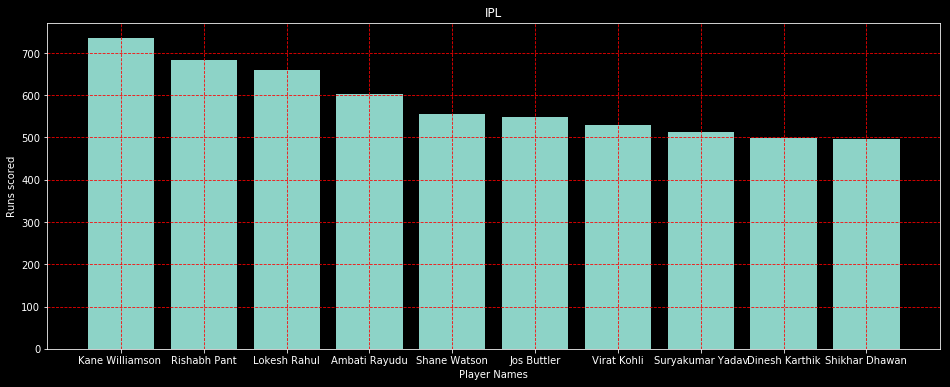

In [30]:
# plotting a graph between the top 10 batsmen with highest runs
from turtle import color

runs = df['Runs.x'].sort_values(ascending=False)[:10].array
player_names = df['PLAYER'].iloc[df['Runs.x'].sort_values(ascending=False)[:10].index.array]
player_names = player_names.array
plt.figure().set_size_inches(16,6)
plt.bar(player_names,runs)
plt.title("IPL")
plt.xlabel("Player Names")
plt.ylabel("Runs scored")
plt.grid(linestyle='--',color='red')
plt.show()

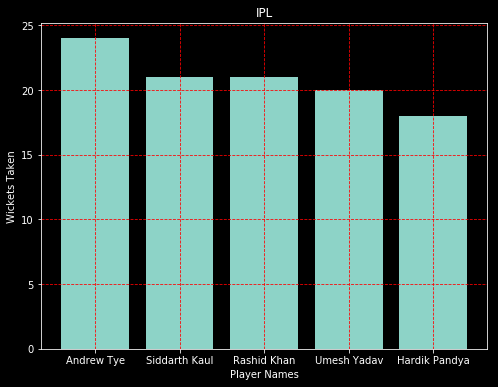

In [31]:
# plotting the graph between the player with the most number of wickets
wickets = df['Wkts'].sort_values(ascending=False)[:5]
player_names = df['PLAYER'].iloc[df['Wkts'].sort_values(ascending=False)[:5].index.array]
player_names = player_names.array
plt.figure().set_size_inches(8,6)
plt.bar(player_names,wickets)
plt.title("IPL")
plt.xlabel("Player Names")
plt.ylabel("Wickets Taken")
plt.grid(linestyle='--',color='red')
plt.show()

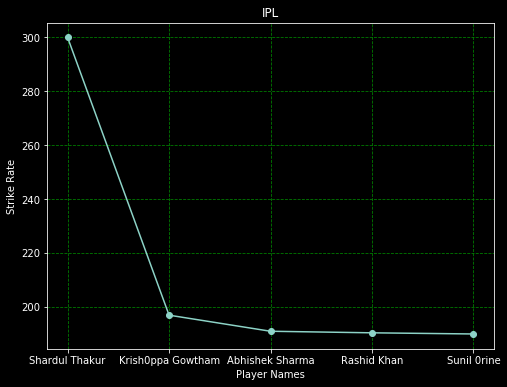

In [38]:
# top 5 batsmen with highest strike rate
strike_rate = list(df['SR.x'].sort_values(ascending=False)[:5].array)
player_names = df['PLAYER'].iloc[df['SR.x'].sort_values(ascending=False)[:5].index.array]
player_names = list(player_names.array)
plt.figure().set_size_inches(8,6)
plt.plot(player_names,strike_rate,marker='o')
plt.title("IPL")
plt.xlabel("Player Names")
plt.ylabel("Strike Rate")
plt.grid(linestyle='--',color='green')
plt.show()

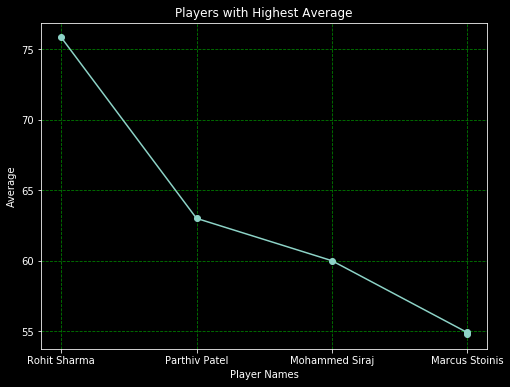

In [33]:
# plotting a graph between people with highest average
a = df['Avg.x'].sort_values(ascending=False)[:5]
player_names = df['PLAYER'].iloc[df['Avg.x'].sort_values(ascending=False)[:5].array]
player_names = list(player_names.array)
a = list(a)
plt.figure().set_size_inches(8,6)
plt.plot(player_names,a,marker='o')
plt.xlabel('Player Names')
plt.ylabel('Average')
plt.title('Players with Highest Average')
plt.grid(color='green',linestyle='--')
plt.show()

In [34]:
df.columns

Index(['PLAYER', 'Mat.x', 'Inns.x', 'NO', 'Runs.x', 'HS', 'Avg.x', 'BF',
       'SR.x', 'X100', 'X50', 'X4s', 'X6s', 'Mat.y', 'Inns.y', 'Ov', 'Runs.y',
       'Wkts', 'BBI', 'Avg.y', 'Econ', 'SR.y', 'X4w', 'X5w', 'y'],
      dtype='object')

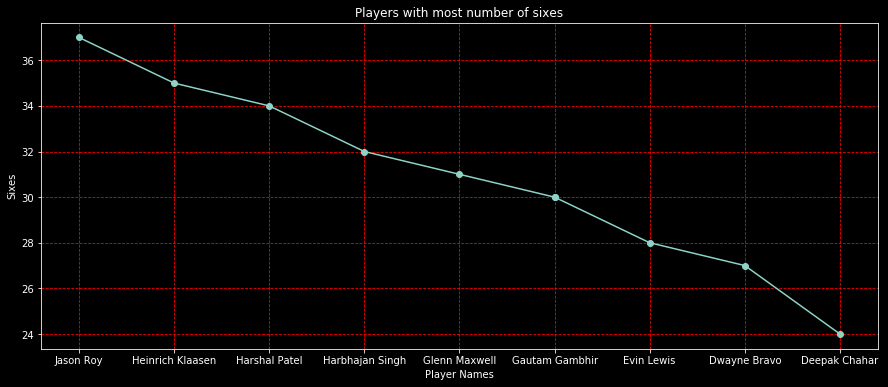

In [35]:
sixes = df['X6s'].sort_values(ascending=False)[:10].to_list()
player_names = df['PLAYER'].iloc[df['X6s'].sort_values(ascending=False)[:10].to_list()]
player_names = player_names.to_list()
plt.figure().set_size_inches(15,6)
plt.plot(player_names,sixes,marker='o')
plt.title('Players with most number of sixes')
plt.xlabel('Player Names')
plt.ylabel('Sixes')
plt.grid(linestyle='--',color='red')
plt.show()